<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics


Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Столбцы Freedom и Positive affect имеют по 155 ненулевых значений, в то время как всего строк в таблице 156. Найдем эту строку:

In [5]:
df.loc[df['Freedom'].isnull(), :]


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


Удалим эту строку:

In [6]:
df = df[df.index != 28]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

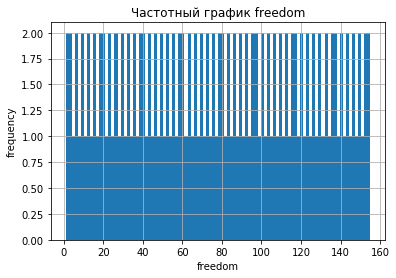

In [7]:
df.Freedom.hist(bins = 100)

plt.xlabel('freedom')
plt.ylabel('frequency')
plt.title('Частотный график freedom')
plt.grid(True)


Параметр Freedom имеет равномерное распределение

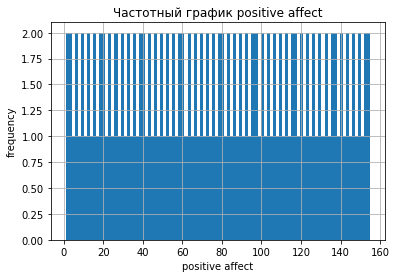

In [8]:
df['Positive affect'].hist(bins = 100)

plt.xlabel('positive affect')
plt.ylabel('frequency')
plt.title('Частотный график positive affect')
plt.grid(True)


Параметро Positive affect имеет равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
freedom = df['Freedom']


In [10]:
# Среднее значение
statistics.mean(freedom)


78.0

In [11]:
# Медиана
statistics.median(freedom)


78.0

In [12]:
# Мода
statistics.mode(df['Freedom'])


StatisticsError: no unique mode; found 155 equally common values

In [13]:
# Минимальное значение
min(freedom)


1.0

In [14]:
# Максимальное значение
max(freedom)


155.0

In [15]:
# Стандартное отклнение
statistics.pstdev(freedom)


44.74371464239419

In [16]:
# Дисперсия
statistics.pvariance(freedom)


2002.0

In [17]:
# Размах
freedom_range = max(freedom) - min(freedom)
print(freedom_range)


154.0


In [18]:
#Выбросы
freedom.unique()

array([  5.,   6.,   3.,   7.,  19.,  11.,  10.,   8.,   9.,  26.,  17.,
        16.,  93.,  28.,  63.,  33.,  44.,  53.,  62.,  58.,   4.,  12.,
        71.,  69., 102.,  98.,  25.,  68.,  95.,  32.,  84.,  30.,  20.,
        74., 132.,  24., 108.,  51.,  52.,   1., 122.,  56.,  13.,  70.,
        50.,  54.,  57.,  81.,  42.,  47.,  18., 126., 144.,  45.,  49.,
        40.,  64.,  39.,  80.,  35., 138.,  34.,  77.,  61.,  37., 114.,
       107.,  15., 124., 128.,  79., 139.,  86., 118.,  66.,  43., 137.,
       140.,  36., 131., 150., 112., 105.,  75.,  38.,  83., 149.,  76.,
       101., 136.,  48.,  31.,  23.,  59.,  90., 115.,  91., 100.,  67.,
        88., 103.,  92., 119.,  22.,  85.,  87., 145.,   2., 134., 121.,
        14.,  82., 111., 127., 123., 117., 109., 104.,  89.,  72., 151.,
        46., 143.,  27., 130., 125., 110., 116.,  55.,  29., 142., 141.,
       106., 113.,  99., 129.,  73., 120.,  41.,  94., 148., 146.,  97.,
       135.,  96., 152.,  60., 153.,  65., 147.,  2

Если посмотреть на диапазлн значений, который принимает величина Freedom, то можно понять, что выбросов нет.


Почему нельзя найти моду?

Моду нельзя найти, так как нет одного значения, которо повторяется чаще других (параметр Freedom имеет равномерное рапределение)

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

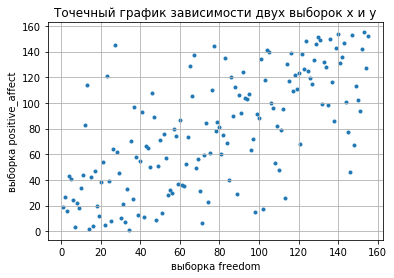

In [19]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [20]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601656


Можно говорить о существовании корреляции между Freedom и positive affect. Так как коффициент Пирсона больше 0, то корреляция прямая, то есть с ростом Freedom растет positive affect (или с ростом positive affect растет Freedom).

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [21]:
# Центрирование
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [22]:
min(freedom_1)

-77.0

In [23]:
max(freedom_1)

77.0

In [24]:
# Проведем масштабирование (значение колонки freedom будут в интервале от -1 до 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

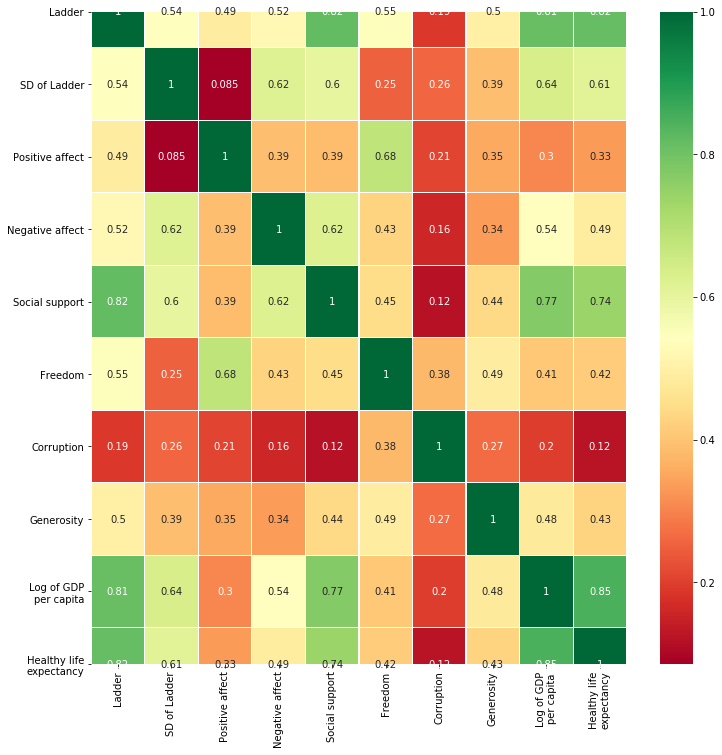

In [25]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Из матрицы корреляций видно, что наибольшей корреляцией обладают Healthy life expectancy и Log of GDP per capita (0,85), Ladder и Social support (0,82), Ladder и Log of GDP per capita (0.81).

Загрузить таблицу цен на авокадо: 

In [26]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

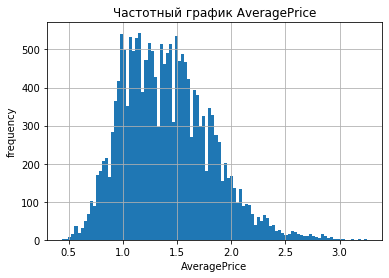

In [28]:
df['AveragePrice'].hist(bins = 100)

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice')
plt.grid(True)

AveragePrice имеет нормальное распределение (наблюдается некоторое смещение влево)

In [29]:
# Среднее значение
av_price = df['AveragePrice']
statistics.mean(av_price)

1.405978409775878

In [30]:
# Стандартное отклонение
statistics.pstdev(av_price)

0.40266552250546717

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

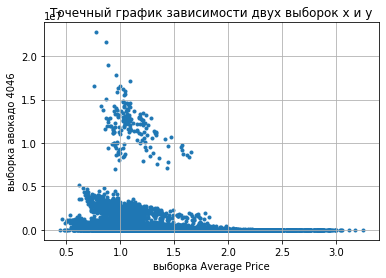

In [31]:
av_4046 = df['4046']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка авокадо 4046')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(av_price, av_4046, marker='.')

In [41]:
corr, p_value = pearsonr(av_price, av_4046)
print('Pearsons correlation coefficient: %.3f' % corr)

Pearsons correlation coefficient: -0.179


In [38]:
coef, p = sts.spearmanr(av_price, av_4046)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.533


In [39]:
coef, p = sts.kendalltau(av_price, av_4046)
print('Kendall correlation coefficient: %.3f' % coef)

Kendall correlation coefficient: -0.375


Между показателями Average Price и колонкой 4046 линейной корреляции нет. Коэффициент Спирмена показывает очень слабую обратную корреляцию.

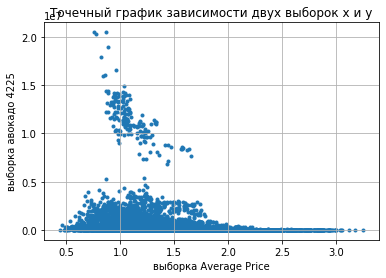

In [33]:
av_4225 = df['4225']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка авокадо 4225')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(av_price, av_4225, marker='.')

In [42]:
corr, p_value = pearsonr(av_price, av_4225)
print('Pearsons correlation coefficient: %.3f' % corr)

Pearsons correlation coefficient: -0.173


In [43]:
coef, p = sts.spearmanr(av_price, av_4225)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.514


In [44]:
coef, p = sts.kendalltau(av_price, av_4225)
print('Kendall correlation coefficient: %.3f' % coef)

Kendall correlation coefficient: -0.344


Между показателями Average Price и колонкой 4225 линейной корреляции нет. Коэффициент Спирмена показывает очень слабую обратную корреляцию.

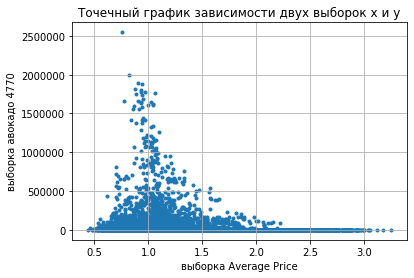

In [36]:
av_4770 = df['4770']
plt.xlabel('выборка Average Price')
plt.ylabel('выборка авокадо 4770')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(av_price, av_4770, marker='.')

In [45]:
corr, p_value = pearsonr(av_price, av_4770)
print('Pearsons correlation coefficient: %.3f' % corr)

Pearsons correlation coefficient: -0.179


In [46]:
coef, p = sts.spearmanr(av_price, av_4770)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: -0.533


In [47]:
coef, p = sts.kendalltau(av_price, av_4770)
print('Kendall correlation coefficient: %.3f' % coef)

Kendall correlation coefficient: -0.375


Между показателями Average Price и колонкой 4770 линейной корреляции нет. Коэффициент Спирмена показывает очень слабую обратную корреляцию.